### Modeling on a small subset of data

This is the second attempt to model on the small subset.  In total I had 1400 songs to extract features from.  Parsing audio files and computing the features is intensive (it took about 3 hrs for the simply MFCCs on 17% of the songs) so I wanted to make sure that I don't waste too much time getting features I don't need.

This time I used the enhance chroma for the features.

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# enh_chroma = np.empty((12 ,))
# for files in glob.glob("D:\MusicSubset\*\*.mp3"):
#     enh_chroma = np.vstack((enh_chroma, enhanced_chroma_parser(files)))

In [ ]:
# np.savetxt('subset_enh_chroma.npy', enh_chroma, delimiter=',')

In [19]:
chroma = np.loadtxt('subset_enh_chroma.npy', delimiter= ',')

In [20]:
chroma.shape

(240, 12)

In [21]:
track_df = pd.read_csv('subset_df.csv')

In [78]:
X = chroma
y = track_df['genre']

lb = LabelEncoder()

y = tf.keras.utils.to_categorical(lb.fit_transform(y))

In [79]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, stratify=y )

In [80]:
ss = StandardScaler()

Xtrain_ss = ss.fit_transform(Xtrain)  # As with most data, it's important to scale audio features.  
Xtest_ss = ss.transform(Xtest)        # Features with wildly differing distributions can be problematic.

In [81]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(180, 12)
(60, 12)
(180, 6)
(60, 6)


In [4]:
model = Sequential()

model.add(Dense(256, input_shape=(12,), 
                       activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(256, 
                       activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(128, 
                       activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               3328      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

In [59]:
subset_history = model.fit(
    x=Xtrain_ss,
    y=ytrain,
    batch_size=18,
    epochs=20,
    validation_data=(Xtest_ss, ytest),
    verbose=2
)

Train on 180 samples, validate on 60 samples
Epoch 1/20
180/180 - 0s - loss: 1.8997 - accuracy: 0.1333 - val_loss: 1.7319 - val_accuracy: 0.2667
Epoch 2/20
180/180 - 0s - loss: 1.7299 - accuracy: 0.2444 - val_loss: 1.6593 - val_accuracy: 0.3167
Epoch 3/20
180/180 - 0s - loss: 1.6763 - accuracy: 0.2556 - val_loss: 1.5940 - val_accuracy: 0.3500
Epoch 4/20
180/180 - 0s - loss: 1.6077 - accuracy: 0.3389 - val_loss: 1.5346 - val_accuracy: 0.3333
Epoch 5/20
180/180 - 0s - loss: 1.5714 - accuracy: 0.3167 - val_loss: 1.4880 - val_accuracy: 0.3667
Epoch 6/20
180/180 - 0s - loss: 1.5499 - accuracy: 0.3667 - val_loss: 1.4705 - val_accuracy: 0.3500
Epoch 7/20
180/180 - 0s - loss: 1.5004 - accuracy: 0.3444 - val_loss: 1.4469 - val_accuracy: 0.3667
Epoch 8/20
180/180 - 0s - loss: 1.4724 - accuracy: 0.3778 - val_loss: 1.4327 - val_accuracy: 0.3667
Epoch 9/20
180/180 - 0s - loss: 1.3759 - accuracy: 0.4167 - val_loss: 1.4245 - val_accuracy: 0.3833
Epoch 10/20
180/180 - 0s - loss: 1.4247 - accuracy: 0.3

In [13]:
subset_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

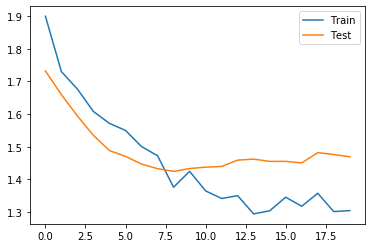

In [60]:
plt.plot(subset_history.history['loss'], label='Train')
plt.plot(subset_history.history['val_loss'], label='Test')
plt.legend();

In [6]:
plt.plot(subset_history.history['accuracy'], label='Train')
plt.plot(subset_history.history['val_accuracy'], label='Test')
plt.title("Accuracy")
plt.legend();

NameError: name 'subset_history' is not defined

The enhanced chroma alone barely got to 40%.  It's still better than baseline so with the mfcc's I hope it will greatly improve the score.